### Introduction
The chosen dataset contains information about employees of a specific company. This ranges from workplace satisfaction to how far an employee lives from the company

In [2]:
import pandas as pd
import numpy as np
import sklearn.linear_model
import sklearn.ensemble
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt

### Initial data exploration 
By looking at the data there is some interesting properties. Most importantly i find that the choice of gauging certain colummns with numbers ranging from 1-4. This is interesting because alot of the columns are personal topics such as relationship status and performance as rated by their manager. This way of gauging will inevetiably introduce discrepancies in the data since managers might have differing opinions on how to do the rating(even if a written guideline exists). We also see that there is some missing values in the dataset, but have not yet identified if their is a pattern of the missing data is important. For some of the columns which hold strings, the convention for formatting the strings is different. In some columns multi-word strings are seperatd by a _ while others use whitespace. This is probably not meaningful, but shows signs that they lack a clear convention for how to format the data. 
If i were to look at this from the viewpoint of the company, the most interesting metric to me would probably be "performance rating". What affects an employees performance rating? How can we help our employees achieve higher performance ratings? Which of the other metrics affects the performance rating?

In [3]:

df = pd.read_csv("employee-data.csv")
df

,age,attrition,business-travel,department,distance-from-home,education,education-field,employee-number,environment-satisfaction,gender,...,last-salary-increase-percentage,performance-rating,relationship-satisfaction,stock-option-level,total-working-years,work-life-balance,years-at-company,years-in-current-role,years-since-last-promotion,years-with-current-manager
0,41.0,Yes,Travel_Rarely,Sales,1.0,2.0,Life Sciences,1.0,2.0,Female,...,11.0,3.0,1.0,0.0,8.0,1.0,6.0,4.0,0.0,5.0
1,49.0,No,Travel_Frequently,Research & Development,8.0,1.0,Life Sciences,2.0,3.0,Male,...,23.0,4.0,4.0,1.0,10.0,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,Travel_Rarely,Research & Development,2.0,2.0,Other,4.0,4.0,Male,...,15.0,3.0,2.0,0.0,7.0,3.0,0.0,0.0,0.0,0.0
3,33.0,No,Travel_Frequently,Research & Development,3.0,4.0,Life Sciences,5.0,4.0,Female,...,11.0,3.0,3.0,0.0,8.0,3.0,8.0,7.0,3.0,0.0
4,27.0,No,Travel_Rarely,Research & Development,2.0,1.0,Medical,7.0,1.0,Male,...,12.0,3.0,4.0,1.0,6.0,3.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,Travel_Frequently,Research & Development,23.0,2.0,Medical,2061.0,3.0,Male,...,17.0,3.0,3.0,1.0,17.0,3.0,5.0,2.0,0.0,3.0
1466,39.0,No,Travel_Rarely,Research & Development,6.0,1.0,NaN,2062.0,4.0,Male,...,15.0,3.0,1.0,1.0,9.0,3.0,7.0,7.0,1.0,7.0
1467,27.0,No,Travel_Rarely,Research & Development,4.0,3.0,Life Sciences,2064.0,2.0,Male,...,20.0,4.0,2.0,1.0,6.0,3.0,6.0,2.0,0.0,3.0
1468,49.0,No,Travel_Frequently,Sales,2.0,3.0,Medical,2065.0,4.0,Male,...,14.0,3.0,4.0,0.0,17.0,2.0,9.0,6.0,0.0,8.0


### Hypothesis 
How is employee performance rating affected by relevant fields such as <br>
-environment satisfaction <br>
-Job satisfaction <br>
-monthly income <br>
-over time <br>
-last salary increase percentage <br>
-work life balance <br>
-years since last promotion <br>

### Data cleaning 
As can be seen above there is unfornuately a lot of missing values. There is 1470 entries in total and not a single column out of the 27 has a full 1470 entries.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1457 non-null   float64
 1   attrition                        1461 non-null   object 
 2   business-travel                  1464 non-null   object 
 3   department                       1465 non-null   object 
 4   distance-from-home               1462 non-null   float64
 5   education                        1459 non-null   float64
 6   education-field                  1462 non-null   object 
 7   employee-number                  1464 non-null   float64
 8   environment-satisfaction         1464 non-null   float64
 9   gender                           1460 non-null   object 
 10  job-involvement                  1460 non-null   float64
 11  job-level                        1464 non-null   float64
 12  job-role            

As can be seen below there are 226 rows which has missing data. The missing data seems to be haphazard and not confined to a single column. It is very likely that it is the result of human error when filling out the dataset. However it is important to note that it is not the entire rows which are missing, but only about 1-2 columns in each row. While this is not much in the context of individual rows, the affected rows make up about 15% of the total dataset. Because of this i chose not to drop the rows, since that would remove a significant amount of available data. 
Some columns has strings as values while others has floats. To handle these different cases i will use different aproaches.  

In [5]:
df[df.isna().any(axis=1)]



,age,attrition,business-travel,department,distance-from-home,education,education-field,employee-number,environment-satisfaction,gender,...,last-salary-increase-percentage,performance-rating,relationship-satisfaction,stock-option-level,total-working-years,work-life-balance,years-at-company,years-in-current-role,years-since-last-promotion,years-with-current-manager
12,31.0,No,Travel_Rarely,Research & Development,26.0,1.0,Life Sciences,16.0,1.0,Male,...,NaN,3.0,4.0,1.0,5.0,2.0,5.0,2.0,4.0,3.0
22,34.0,No,Travel_Rarely,Research & Development,7.0,4.0,NaN,28.0,1.0,Female,...,11.0,3.0,3.0,0.0,13.0,3.0,12.0,6.0,2.0,11.0
27,42.0,No,Travel_Rarely,Sales,8.0,4.0,Marketing,35.0,3.0,Male,...,11.0,3.0,4.0,1.0,10.0,NaN,9.0,7.0,4.0,2.0
41,27.0,No,Travel_Rarely,Research & Development,2.0,NaN,Life Sciences,54.0,4.0,Female,...,13.0,3.0,4.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0
43,27.0,No,Travel_Frequently,Sales,8.0,3.0,Life Sciences,56.0,4.0,Male,...,15.0,3.0,4.0,0.0,9.0,3.0,9.0,8.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,42.0,No,Travel_Rarely,Research & Development,2.0,3.0,Life Sciences,2031.0,1.0,Male,...,11.0,3.0,1.0,0.0,24.0,2.0,22.0,6.0,4.0,14.0
1446,34.0,No,Travel_Rarely,Sales,28.0,3.0,Marketing,2035.0,4.0,Female,...,21.0,4.0,4.0,2.0,8.0,3.0,8.0,7.0,1.0,7.0
1451,38.0,No,Travel_Rarely,Sales,NaN,2.0,Life Sciences,2041.0,1.0,Female,...,11.0,3.0,3.0,1.0,10.0,3.0,10.0,NaN,1.0,9.0
1456,35.0,No,Travel_Frequently,Research & Development,18.0,4.0,Life Sciences,2049.0,3.0,Male,...,14.0,3.0,4.0,2.0,10.0,4.0,10.0,2.0,0.0,2.0


### Handling missing string values
To handle this i choose a rather simple approach. I simply change every `NaN` occurence with the mode of the given column
### Handling missing float values
Again i choose a simple approach. I change every `NaN` occurence the value next to it.

In [6]:
columns_to_replace_strings = ['business-travel', 'attrition', 'age', 'education-field', 'department']
for column in columns_to_replace_strings:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

for column in df.columns:
    if column not in columns_to_replace_strings:
         df[column].fillna(method="bfill", inplace=True)



In [7]:
df[df.isna().any(axis=1)]

,age,attrition,business-travel,department,distance-from-home,education,education-field,employee-number,environment-satisfaction,gender,...,last-salary-increase-percentage,performance-rating,relationship-satisfaction,stock-option-level,total-working-years,work-life-balance,years-at-company,years-in-current-role,years-since-last-promotion,years-with-current-manager


Now that `NaN` values have been removed by appropiate replacements i will remove columns which i will not include in my analysis. 

In [8]:
# List of columns to keep in the DataFrame
columns_to_keep = ['job-satisfaction', 'monthly-income', 'stock-option-level', 'over-time', 'last-salary-increase-percentage', 'years-since-last-promotion', 'performance-rating']

# Remove columns not in the specified list
columns_to_remove = list(set(df.columns) - set(columns_to_keep))
moneytary_incentives = df.drop(columns=columns_to_remove)
# Map overtime column to boolean values to allow us to include it in the correlation matrix
moneytary_incentives['over-time'] = moneytary_incentives['over-time'].map({'Yes': True, 'No': False})
moneytary_incentives


,job-satisfaction,monthly-income,over-time,last-salary-increase-percentage,performance-rating,stock-option-level,years-since-last-promotion
0,4.0,5993.0,True,11.0,3.0,0.0,0.0
1,2.0,5130.0,False,23.0,4.0,1.0,1.0
2,3.0,2090.0,True,15.0,3.0,0.0,0.0
3,3.0,2909.0,True,11.0,3.0,0.0,3.0
4,2.0,3468.0,False,12.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...
1465,4.0,2571.0,False,17.0,3.0,1.0,0.0
1466,1.0,9991.0,False,15.0,3.0,1.0,1.0
1467,2.0,6142.0,True,20.0,4.0,1.0,0.0
1468,2.0,5390.0,False,14.0,3.0,0.0,0.0


To find relationships between the different variables, i will make us of a heatmap. These are a commonly used visualization to show relationships between variables.

<Axes: >

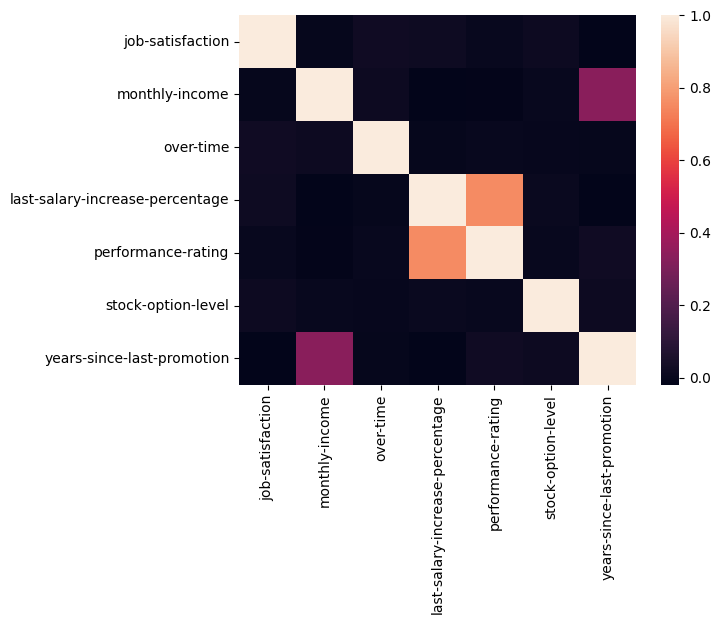

In [9]:
sns.heatmap(moneytary_incentives.corr(numeric_only=True))


The resulsts are somewhat surprising to me. Virtually none of the parameters i expected to have an effect on `performance-rating` has any relationship to it. Only `last-salary-increase-percentage` has a obvious relationhip to `performance-rating`. We must be careful when looking at this result. That is because that `performance-rating` is most likely not dependend on `last-salary-increase-percentage` but the other way around. This result suggests employees with an already high `performance-rating` tend to get higher salary increases. While interesting it does not really tell us anything meaningfull about our initial hypothesis on its own. 

### Looking back at my hypothesis
I have now realised that my initial hypothesis might have been too narrow. Therefore i am revising it to allow for more analysis:<br>
*It is possible to find which factors increases an employees `performance-rating`*<br>
Looking at my initial heatmap with this new viewpoint, i choose to group the columns used in the figure as **monetary incentives** since most of them deal with an employees financial situation in the company. 
### Further analysis

In [10]:
# List of columns to keep in the DataFrame
columns_to_keep = ['marial-status', 'work-life-balance', 'relationship-satisfaction', 'gender', 'age','performance-rating']

# Remove columns not in the specified list
columns_to_remove = list(set(df.columns) - set(columns_to_keep))
personal_situation = df.drop(columns=columns_to_remove)
personal_situation['gender'] = personal_situation['gender'].map({'Female': 1, 'Male': 0})
personal_situation['marial-status'] = personal_situation['marial-status'].map({'Married': True, 'Single': False})
personal_situation

,age,gender,marial-status,performance-rating,relationship-satisfaction,work-life-balance
0,41.0,1,False,3.0,1.0,1.0
1,49.0,0,True,4.0,4.0,3.0
2,37.0,0,False,3.0,2.0,3.0
3,33.0,1,True,3.0,3.0,3.0
4,27.0,0,True,3.0,4.0,3.0
...,...,...,...,...,...,...
1465,36.0,0,True,3.0,3.0,3.0
1466,39.0,0,True,3.0,1.0,3.0
1467,27.0,0,True,4.0,2.0,3.0
1468,49.0,0,True,3.0,4.0,2.0


<Axes: >

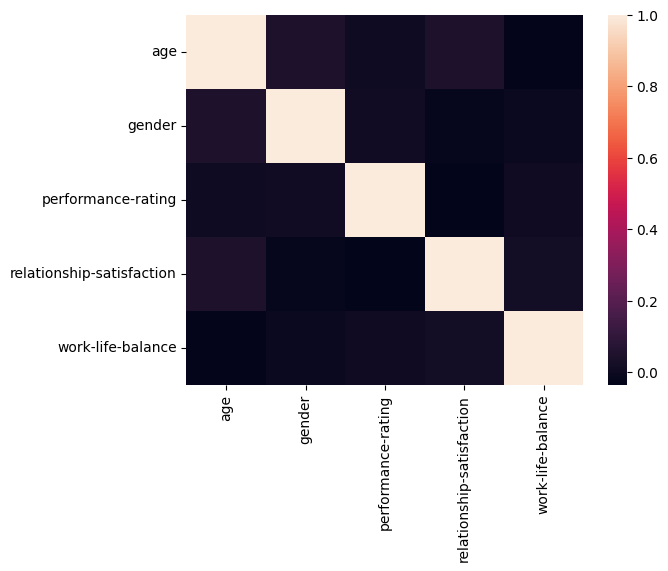

In [11]:
sns.heatmap(personal_situation.corr(numeric_only=True))

Again there is no correlations between performance-rating and the other columns i elected to choose. 

In [13]:
df["performance-rating"].value_counts()

performance-rating
3.0    1246
4.0     224
Name: count, dtype: int64

As can be seen above i tried to make a heatmap including the whole dataframe in order to see if maybe one of the columns i didnt expect to have a correlation with `performance-rating` would have it. But as can be seen above it would seem that no columns share any meaningful correlation with `performance-rating`

I found myself having alot of trouble with how i should proceed from here. I dont feel like i put enough work into this as is, but i think i more or less answered my hypothesis. What should i have done?